In [3]:
# url='https://github.com/ShaoZC/Quantitative_Risk_Management_in_Python/blob/master/bike-sharing-demand/train.csv'
url='C:/Temp/bike-sharing-demand/train.csv'
import pandas
train=pandas.read_csv(url)
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt
#时间特征处理  "2011-01-20 00:00:00"时间字段的格式是这样的，日期+时间
#创建一个新的表框
periodDf=train[['datetime','season','holiday','workingday','count']]
#避免报错
periodDf.is_copy = None
#日期处理，把日期提取出来（用匿名函数分离出来）
periodDf['date']=periodDf['datetime'].apply(lambda x: x.split()[0])
periodDf['time']=periodDf['datetime'].apply(lambda x: x.split()[1])
periodDf['year']=periodDf['date'].apply(lambda x: x.split('-')[0])
periodDf['month']=periodDf['date'].apply(lambda x: x.split('-')[1])
periodDf['day']=periodDf['date'].apply(lambda x: x.split('-')[2])
periodDf['hour']=periodDf['time'].apply(lambda x: x.split(':')[0])
#星期
periodDf['weekday']=periodDf['datetime'].apply(lambda x: pd.to_datetime(x).weekday())
#看看处理后的periodDf

(0.0, 11.0)

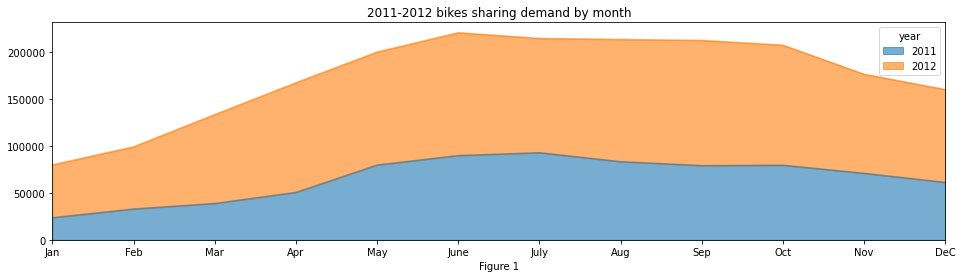

In [6]:
#绘图
fig1=plt.figure(figsize=(16,4))
ax1=plt.subplot(111)
df1=periodDf.groupby(['month','year']).sum().unstack()['count']#unstack(),将列索引变为行索引
df1.plot(kind='area',ax=ax1,alpha=0.6)
ax1.set_title('2011-2012 bikes sharing demand by month')
ax1.set_xlabel('Figure 1')
ax1.set_xticks(list(range(12)))
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','DeC'])
ax1.set_xlim(0,11)